   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.42             0.46               2                   150   
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years      sales  \
0                   3              0     1                      0      sales   
1                   2              0     0                      0  technical   
2                   3              0     0                      0  technical   
3                   3              1     0                      0  technical   
4                   4              0     1                      0  technical   

   salary  
0  medium  
1  medium  
2 

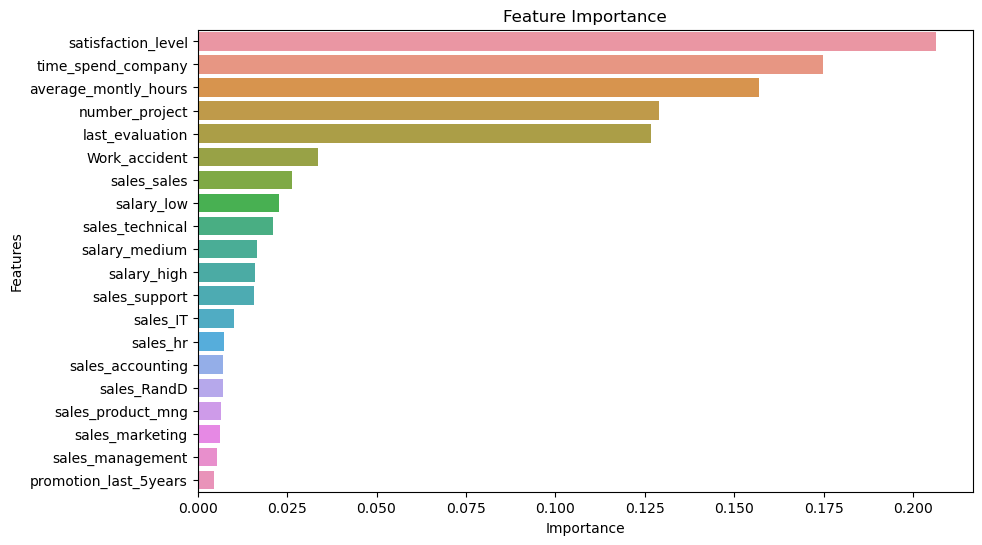

C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.673063973063973
Precision: 0.6536912751677852
Recall: 0.6815955213435969
F1 Score: 0.6673518328194588
ROC AUC Score: 0.6733740098606369

Random Forest:
Accuracy: 0.901010101010101
Precision: 0.9389017788089714
Recall: 0.8495451364590623
F1 Score: 0.8919911829537105
ROC AUC Score: 0.8991398621944889

Gradient Boosting:
Accuracy: 0.8828282828282829
Precision: 0.9232576350822239
Recall: 0.8250524842547236
F1 Score: 0.8713968957871396
ROC AUC Score: 0.8807287080585753

Best Parameters:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest:
Accuracy: 0.9053872053872054
Precision: 0.9435857805255023
Recall: 0.85444366689993
F1 Score: 0.8968049944913697
ROC AUC Score: 0.9035359152150526


C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier:
Accuracy: 0.8919191919191919
Precision: 0.9268104776579353
Recall: 0.8418474457662701
F1 Score: 0.8822882288228824
ROC AUC Score: 0.8900995827144135


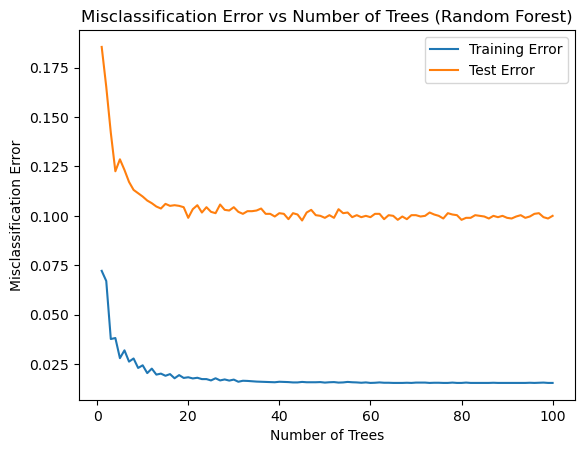

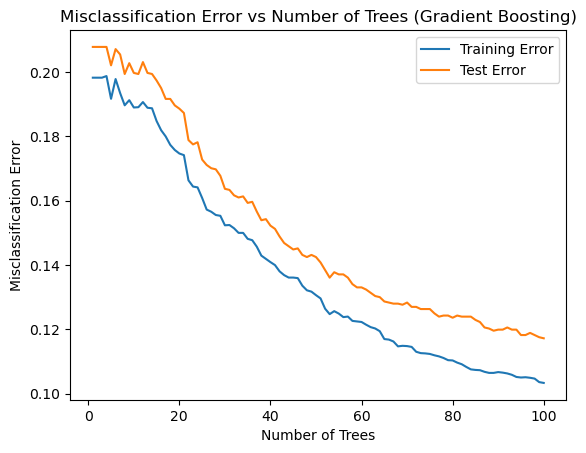

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Data Preparation
# Load the dataset
df = pd.read_csv("hr_train.csv")

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Perform data cleaning and preprocessing
# Handle missing values
# Let's fill missing values with the median for numerical columns
# For categorical features, let's fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# For categorical features, let's fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])

# Handle categorical variables
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray(),
                                 columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
df_encoded = pd.concat([df[numerical_features], encoded_features], axis=1)

# Step 2: Handling Imbalanced Data
# Investigate class imbalance
print(df['left'].value_counts())

# Implement resampling techniques
# Let's use SMOTE for oversampling
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Feature Engineering
# No additional feature engineering needed for now

# Step 4: Feature Importance Analysis
# Train a random forest classifier to get feature importance
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Step 5: Model Building
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Choose appropriate machine learning algorithms
# Let's use Logistic Regression, Random Forest, and Gradient Boosting
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train multiple models
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 6: Model Evaluation
# Evaluate the performance of each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print()

# Step 7: Hyperparameter Tuning
# Let's perform hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Tuned Random Forest:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Step 8: Ensemble Methods
# Let's use Voting Classifier with Logistic Regression, Random Forest, and Gradient Boosting
voting_classifier = VotingClassifier(
    estimators=[('lr', models['Logistic Regression']),
                ('rf', models['Random Forest']),
                ('gb', models['Gradient Boosting'])],
    voting='soft'
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Evaluate the Voting Classifier
y_pred = voting_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Voting Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Step 9: Model Interpretation
# Feature importance is already discussed above

# Plot misclassification error vs number of trees for Bagging and Boosting algorithms
# Let's use Random Forest and Gradient Boosting for this
train_errors = []
test_errors = []

# For Random Forest
for n_estimators in range(1, 101):
    rf_model = RandomForestClassifier(n_estimators=n_estimators)
    rf_model.fit(X_train, y_train)
    train_errors.append(1 - rf_model.score(X_train, y_train))
    test_errors.append(1 - rf_model.score(X_test, y_test))

plt.plot(range(1, 101), train_errors, label="Training Error")
plt.plot(range(1, 101), test_errors, label="Test Error")
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error vs Number of Trees (Random Forest)")
plt.legend()
plt.show()

# For Gradient Boosting
train_errors = []
test_errors = []

for n_estimators in range(1, 101):
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators)
    gb_model.fit(X_train, y_train)
    train_errors.append(1 - gb_model.score(X_train, y_train))
    test_errors.append(1 - gb_model.score(X_test, y_test))

plt.plot(range(1, 101), train_errors, label="Training Error")
plt.plot(range(1, 101), test_errors, label="Test Error")
plt.xlabel("Number of Trees")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error vs Number of Trees (Gradient Boosting)")
plt.legend()
plt.show()


C:\Users\Medhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Medhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Medhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Medhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

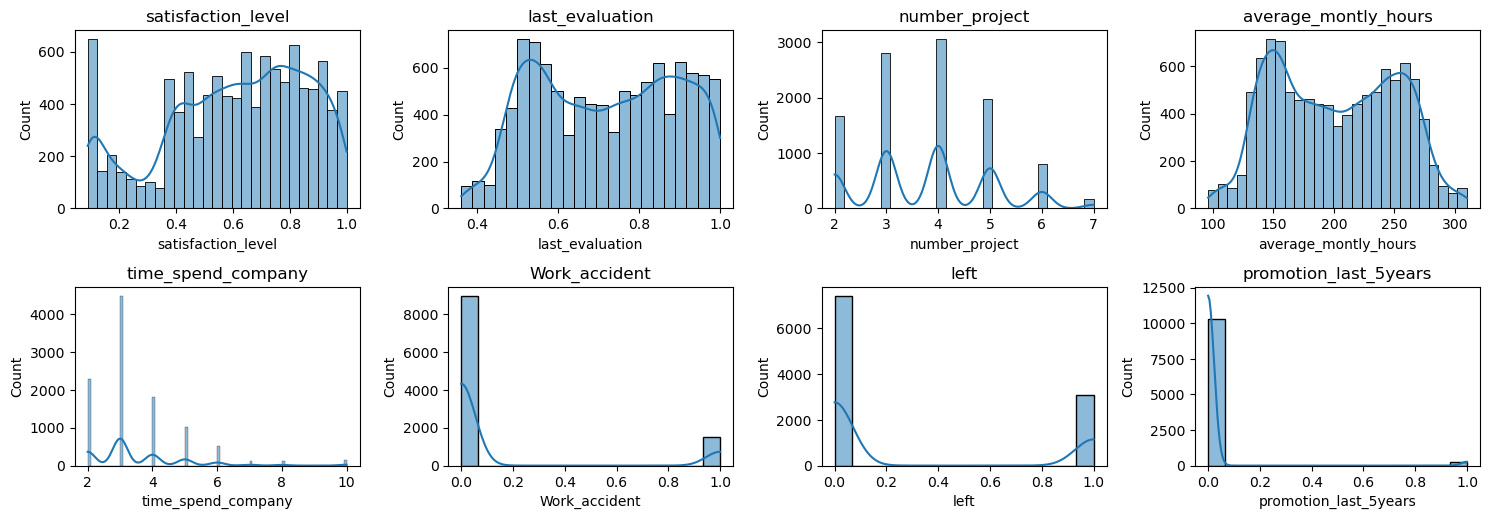

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.42             0.46               2                   150   
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years      sales  \
0                   3              0     1                      0      sales   
1                   2              0     0                      0  technical   
2                   3              0     0                      0  technical   
3                   3              1     0                      0  technical   
4                   4              0     1                      0  technical   

   salary  
0  medium  
1  medium  
2 

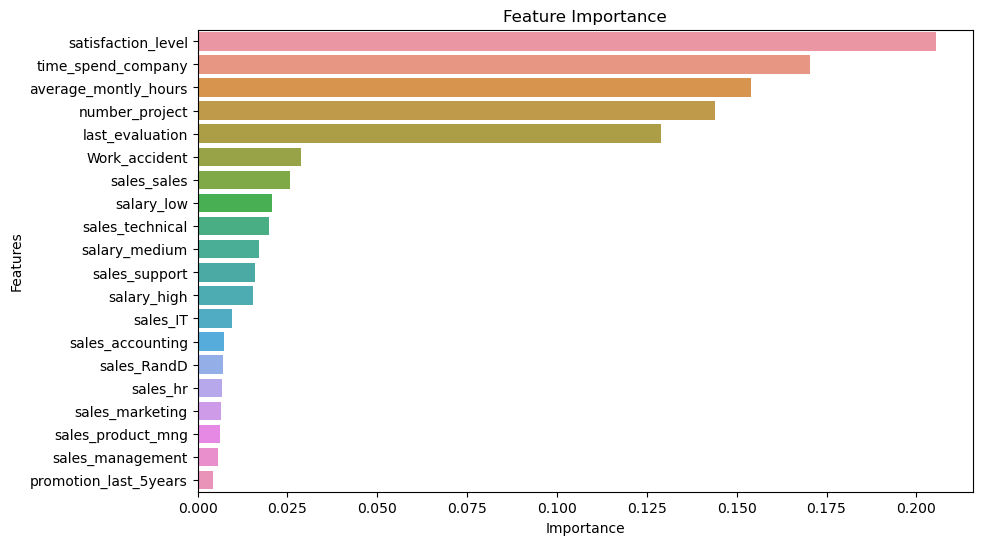

C:\Users\Medhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.673063973063973
Precision: 0.6536912751677852
Recall: 0.6815955213435969
F1 Score: 0.6673518328194588
ROC AUC Score: 0.6733740098606369

Random Forest:
Accuracy: 0.9
Precision: 0.9374034003091191
Recall: 0.8488453463960812
F1 Score: 0.8909291222915902
ROC AUC Score: 0.8981410378962885

Gradient Boosting:
Accuracy: 0.8828282828282829
Precision: 0.9232576350822239
Recall: 0.8250524842547236
F1 Score: 0.8713968957871396
ROC AUC Score: 0.8807287080585753



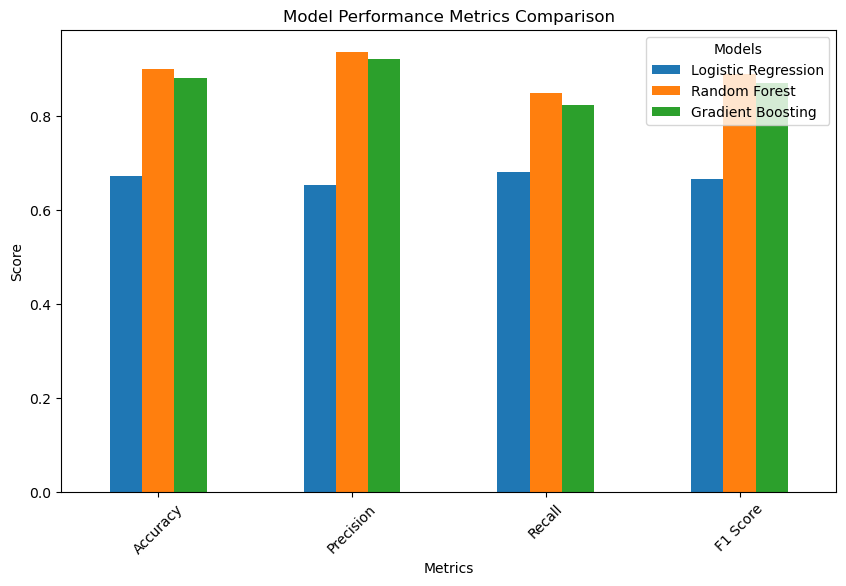

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Visualize distributions of features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Data Preparation
# Load the dataset
df = pd.read_csv("hr_train.csv")

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Perform data cleaning and preprocessing
# Handle missing values
# Let's fill missing values with the median for numerical columns
# For categorical features, let's fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

imputer = SimpleImputer(strategy='median')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# For categorical features, let's fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])

# Handle categorical variables
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray(),
                                 columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numerical features
df_encoded = pd.concat([df[numerical_features], encoded_features], axis=1)

# Step 2: Handling Imbalanced Data
# Investigate class imbalance
print(df['left'].value_counts())

# Implement resampling techniques
# Let's use SMOTE for oversampling
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Feature Engineering
# No additional feature engineering needed for now

# Step 4: Feature Importance Analysis
# Train a random forest classifier to get feature importance
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Step 5: Model Building
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Choose appropriate machine learning algorithms
# Let's use Logistic Regression, Random Forest, and Gradient Boosting
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train multiple models
for name, model in models.items():
    model.fit(X_train, y_train)

# Compare model performance using a bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = pd.DataFrame(columns=models.keys(), index=metrics)
# Step 6: Model Evaluation
# Evaluate the performance of each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    scores.loc['Accuracy', name] = accuracy
    scores.loc['Precision', name] = precision
    scores.loc['Recall', name] = recall
    scores.loc['F1 Score', name] = f1
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print()

scores.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.show()
